<a href="https://colab.research.google.com/github/Maryam-youssef/Fraud-Detection/blob/main/Copy_of_NLP_Mail_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('//content//drive//MyDrive//fraud_email_.csv')
df.head()

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11929 entries, 0 to 11928
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    11928 non-null  object
 1   Class   11929 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 186.5+ KB


In [ ]:
df.shape

(11929, 2)

In [ ]:
df.describe()

,Class
count,11929.000000
mean,0.434823
std,0.495754
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df.columns

Index(['Text', 'Class'], dtype='object')

In [ ]:
df.isnull().sum()

,0
Text,1
Class,0


In [ ]:
df = df.dropna(subset=['Text'])
print(df.isnull().sum())



Text     0
Class    0
dtype: int64


In [ ]:
# now we want to know the percentage of fruad and non fraud transactions
fraud=df['Class'].value_counts()[1]/len(df)*100
fraud_percentage=round(fraud,2)
print('fraud percentage',fraud_percentage)

not_fraud=df['Class'].value_counts()[0]/len(df)*100
not_fraud_percentage=round(not_fraud,2)
print('not fraud percentage',not_fraud_percentage)

#notes: balanced data

fraud percentage 43.48
not fraud percentage 56.52


<ipython-input-11-415971124e25>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class',data=df,palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Class column distribution\n (Not Fraud->0)(Fraud->1)')

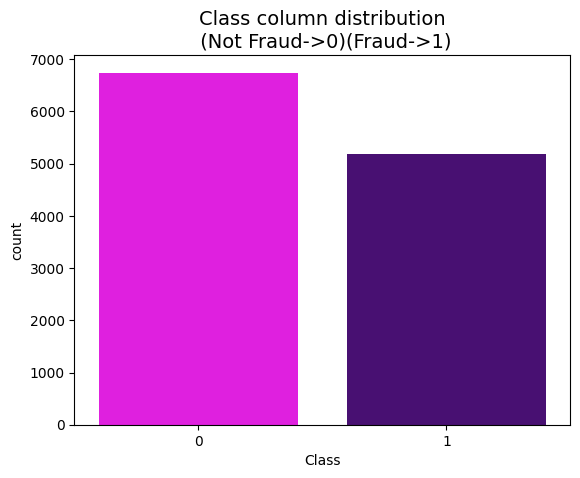

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#FF00FF", "#4B0082"]
sns.countplot(x='Class',data=df,palette=colors)
plt.title("Class column distribution\n (Not Fraud->0)(Fraud->1)",fontsize=14)

 Data Preprocessing



In [ ]:
import re

def clean_text_with_spacing(text):
    # If text is a list (due to tokenization), join it back into a single string
    if isinstance(text, list):
        text = ' '.join(text)
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters, but keep spaces intact
    text = re.sub(r'[^a-z\s]', '', text)
    # Split and rejoin words to standardize spacing
    text = ' '.join(text.split())
    return text

# Apply this updated function to your DataFrame
df['Text'] = df['Text'].apply(clean_text_with_spacing)


In [ ]:
print(df['Text'].sample(5))

6557     that sounds like a good menu we are seeing if ...
11422    concernbri am an american soldier i am serving...
1086     from auditorhead of departmentbank of scotland...
2410     from the desk of bill and exchange managerdr e...
4185     from mark and rose kuntaunited nation assylum ...
Name: Text, dtype: object


In [ ]:
email_index = 6049
print("Email content:", df.loc[email_index, 'Text'])

Email content: from yasmina awana abidjancote d ivoire west africa yasminaawanayahoocom dearest one it is my pleasure to write you after much consideration since i can not be able to see you face to face at first please i need your help i am yasmina awana the only dauther of late joseph awana from cote divoire i am years of age my father was a liability cocoa and gold merchant in abidjan cote divoire before his untimely deathafter his business trip to tunisiato nagociate on a cocoa and gold business he wanted to invest in tunisia a week after he came back from tunisia he got an accident with my mother of which my mother died instantly but my father died five days after in a private hospital on that faithful afternoon i didnbt know that my father was going to leave me after i had earlier lost my mother but before he gave up the ghost it was as if he knew he was going to die he my father may his soul rest in perfect peace called me to his bed side and told me that he deposited the sum of

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
# convert the column to string
df['Text'] = df['Text'].astype(str)   # solution to the (TypeError: expected string or bytes-like object)

df['Text']  = df['Text'].apply(word_tokenize)
print("tokens:", df.loc[6049, 'Text'])
#print(df['Text'] )


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


tokens: ['from', 'yasmina', 'awana', 'abidjancote', 'd', 'ivoire', 'west', 'africa', 'yasminaawanayahoocom', 'dearest', 'one', 'it', 'is', 'my', 'pleasure', 'to', 'write', 'you', 'after', 'much', 'consideration', 'since', 'i', 'can', 'not', 'be', 'able', 'to', 'see', 'you', 'face', 'to', 'face', 'at', 'first', 'please', 'i', 'need', 'your', 'help', 'i', 'am', 'yasmina', 'awana', 'the', 'only', 'dauther', 'of', 'late', 'joseph', 'awana', 'from', 'cote', 'divoire', 'i', 'am', 'years', 'of', 'age', 'my', 'father', 'was', 'a', 'liability', 'cocoa', 'and', 'gold', 'merchant', 'in', 'abidjan', 'cote', 'divoire', 'before', 'his', 'untimely', 'deathafter', 'his', 'business', 'trip', 'to', 'tunisiato', 'nagociate', 'on', 'a', 'cocoa', 'and', 'gold', 'business', 'he', 'wanted', 'to', 'invest', 'in', 'tunisia', 'a', 'week', 'after', 'he', 'came', 'back', 'from', 'tunisia', 'he', 'got', 'an', 'accident', 'with', 'my', 'mother', 'of', 'which', 'my', 'mother', 'died', 'instantly', 'but', 'my', 'fath

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['Text'] = df['Text'].apply(lambda words: [word for word in words if word not in stop_words])
print("tokens after stop word removal:", df.loc[6049, 'Text'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


tokens after stop word removal: ['yasmina', 'awana', 'abidjancote', 'ivoire', 'west', 'africa', 'yasminaawanayahoocom', 'dearest', 'one', 'pleasure', 'write', 'much', 'consideration', 'since', 'able', 'see', 'face', 'face', 'first', 'please', 'need', 'help', 'yasmina', 'awana', 'dauther', 'late', 'joseph', 'awana', 'cote', 'divoire', 'years', 'age', 'father', 'liability', 'cocoa', 'gold', 'merchant', 'abidjan', 'cote', 'divoire', 'untimely', 'deathafter', 'business', 'trip', 'tunisiato', 'nagociate', 'cocoa', 'gold', 'business', 'wanted', 'invest', 'tunisia', 'week', 'came', 'back', 'tunisia', 'got', 'accident', 'mother', 'mother', 'died', 'instantly', 'father', 'died', 'five', 'days', 'private', 'hospital', 'faithful', 'afternoon', 'didnbt', 'know', 'father', 'going', 'leave', 'earlier', 'lost', 'mother', 'gave', 'ghost', 'knew', 'going', 'die', 'father', 'may', 'soul', 'rest', 'perfect', 'peace', 'called', 'bed', 'side', 'told', 'deposited', 'sum', 'ten', 'million', 'five', 'hundred'

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize tokens, specifying POS for verbs
def lemmatize_tokens(tokens):
    lemmatized_tokens = []
    for token in tokens:
        # Try to lemmatize as a verb first
        lemmatized_token = lemmatizer.lemmatize(token, pos='v')

        # Append lemmatized token to the list
        df['Text'] = lemmatized_tokens.append(lemmatized_token)
    return lemmatized_tokens
print("lemmatized tokens:", df.loc[6049, 'Text'])


lemmatized tokens: ['yasmina', 'awana', 'abidjancote', 'ivoire', 'west', 'africa', 'yasminaawanayahoocom', 'dearest', 'one', 'pleasure', 'write', 'much', 'consideration', 'since', 'able', 'see', 'face', 'face', 'first', 'please', 'need', 'help', 'yasmina', 'awana', 'dauther', 'late', 'joseph', 'awana', 'cote', 'divoire', 'years', 'age', 'father', 'liability', 'cocoa', 'gold', 'merchant', 'abidjan', 'cote', 'divoire', 'untimely', 'deathafter', 'business', 'trip', 'tunisiato', 'nagociate', 'cocoa', 'gold', 'business', 'wanted', 'invest', 'tunisia', 'week', 'came', 'back', 'tunisia', 'got', 'accident', 'mother', 'mother', 'died', 'instantly', 'father', 'died', 'five', 'days', 'private', 'hospital', 'faithful', 'afternoon', 'didnbt', 'know', 'father', 'going', 'leave', 'earlier', 'lost', 'mother', 'gave', 'ghost', 'knew', 'going', 'die', 'father', 'may', 'soul', 'rest', 'perfect', 'peace', 'called', 'bed', 'side', 'told', 'deposited', 'sum', 'ten', 'million', 'five', 'hundred', 'thousand',

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Note** Words like "years" have been converted to "year", and "days" to "day"
Words like "wanted" remain as "wanted" instead of the base form "want", and "deposited" still appears as "deposited". This indicates that the lemmatizer may not be reducing all verb forms to their base forms
Words like "cocoa", "money", "soul", and "faithful" stayed the same, as expected, since they’re already in their base forms.
Words like "yasminaawanayahoocom", "abidjancote", and "faeon" remain the same because they’re not in the lemmatizer’s vocabulary, which is normal for names and foreign words.

In [ ]:
'''from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
import nltk

# Download necessary NLTK data if not already downloaded
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Lemmatize tokens with POS tagging
def lemmatize_tokens_with_pos(tokens):
    lemmatized_tokens = []
    pos_tagged_tokens = pos_tag(tokens)  # Get POS tags
    for token, tag in pos_tagged_tokens:
        wordnet_pos = get_wordnet_pos(tag) or wordnet.NOUN  # Default to noun
        lemmatized_token = lemmatizer.lemmatize(token, pos=wordnet_pos)
        lemmatized_tokens.append(lemmatized_token)
    return lemmatized_tokens

print("lemmatized text:", df.loc[6049, 'Text'])'''

'from nltk.stem import WordNetLemmatizer\nfrom nltk.corpus import wordnet\nfrom nltk import pos_tag\nimport nltk\n\n# Download necessary NLTK data if not already downloaded\nnltk.download(\'averaged_perceptron_tagger\')\nnltk.download(\'wordnet\')\n\n# Initialize lemmatizer\nlemmatizer = WordNetLemmatizer()\n\n# Map NLTK POS tags to WordNet POS tags\ndef get_wordnet_pos(tag):\n    if tag.startswith(\'J\'):\n        return wordnet.ADJ\n    elif tag.startswith(\'V\'):\n        return wordnet.VERB\n    elif tag.startswith(\'N\'):\n        return wordnet.NOUN\n    elif tag.startswith(\'R\'):\n        return wordnet.ADV\n    else:\n        return None\n\n# Lemmatize tokens with POS tagging\ndef lemmatize_tokens_with_pos(tokens):\n    lemmatized_tokens = []\n    pos_tagged_tokens = pos_tag(tokens)  # Get POS tags\n    for token, tag in pos_tagged_tokens:\n        wordnet_pos = get_wordnet_pos(tag) or wordnet.NOUN  # Default to noun\n        lemmatized_token = lemmatizer.lemmatize(token, pos=

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the Bag of Words model
vectorizer = CountVectorizer(max_features=5000, min_df=2, max_df=0.7, stop_words='english', ngram_range=(1,2))
# Ensure each document in df['Text'] is a single string becouse countvectorizer input must be a string not list
df['Text'] = df['Text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Fit and transform the preprocessed text data
X_bow = vectorizer.fit_transform(df['Text'])

# Print the shape of the resulting matrix
print("Shape of BoW Features:", X_bow.shape)  # (number_of_documents, number_of_features)

# Optional: Display the BoW features as an array
print("BoW Features:\n", X_bow.toarray())

# Optional: Display the vocabulary
print("Vocabulary:\n", vectorizer.get_feature_names_out())

Shape of BoW Features: (11928, 5000)
BoW Features:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Vocabulary:
 ['abacha' 'abandoned' 'abandoned sum' ... 'zimbabwe' 'zimbabwean' 'zone']


Even after trying to imporove BoW performance , it give us bad results with a huge noise , so we will try TF-IDF


**Note:**BoW matrix has produced a very high-dimensional feature set ( Shape of BoW Features: (11928, 116827)
)
- Sparse Matrices , High Dimensionality & Uninformative Vocabulary so we need to improve the BOW and we will do this by specifying a small range of features and unique words , we need to eliminate this noise to avoid overfitting

min_df=2:

Sets the minimum document frequency. Words appearing in fewer than 2 documents are excluded from the vocabulary.
This helps filter out rare words, which often don’t contribute significantly to model accuracy and can add unnecessary noise to the dataset.
max_df=0.7:

Sets the maximum document frequency. Words that appear in more than 70% of the documents are excluded from the vocabulary.
This helps remove extremely common words (e.g., "email" or "message" in an email dataset) that don’t add much information because they appear too frequently.
stop_words='english':

Removes common English stop words such as "the," "is," "and," etc., which usually don’t add much information to text classification tasks.
This helps reduce noise and focuses on more meaningful words.
ngram_range=(1,2):

Specifies that we want both unigrams (single words) and bigrams (two-word sequences) in our features.
Bigram features can capture short phrases like "credit card" or "fraud alert," which may carry more meaning than individual words alone.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF model
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=2, max_df=0.7, stop_words='english', ngram_range=(1,2))

# Fit and transform the preprocessed text data
X_tfidf = tfidf_vectorizer.fit_transform(df['Text'])

# Display the shape of the resulting TF-IDF matrix
print("Shape of TF-IDF Features:", X_tfidf.shape)

# Convert the TF-IDF matrix to a dense format and put it in a DataFrame for easier viewing
tfidf_matrix = X_tfidf.toarray()
tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF matrix (showing the first few rows for brevity)
print("TF-IDF Matrix:\n", tfidf_df.head())

# Calculate the average TF-IDF score for each word across all documents
average_tfidf_scores = tfidf_df.mean().sort_values(ascending=False)

# Display the top 10 words with the highest average TF-IDF scores
print("Top 10 Words with Highest TF-IDF Scores:\n", average_tfidf_scores.head(10))



Shape of TF-IDF Features: (11928, 5000)
TF-IDF Matrix:
    abacha  abandoned  abandoned sum  abbas  abdul  abedin  abedin huma  \
0     0.0        0.0            0.0    0.0    0.0     0.0          0.0   
1     0.0        0.0            0.0    0.0    0.0     0.0          0.0   
2     0.0        0.0            0.0    0.0    0.0     0.0          0.0   
3     0.0        0.0            0.0    0.0    0.0     0.0          0.0   
4     0.0        0.0            0.0    0.0    0.0     0.0          0.0   

   abidjan  abidjan cote  abidjan economic  ...  youve  youwill  youyours  \
0      0.0           0.0               0.0  ...    0.0      0.0       0.0   
1      0.0           0.0               0.0  ...    0.0      0.0       0.0   
2      0.0           0.0               0.0  ...    0.0      0.0       0.0   
3      0.0           0.0               0.0  ...    0.0      0.0       0.0   
4      0.0           0.0               0.0  ...    0.0      0.0       0.0   

   yrs  yuan  yukos  yukos oil  zimb

** TF-IDF** is effective in identifying important words in emails that may indicate fraudulent intent. It reduces the impact of common words and highlights unique terms.

In [ ]:
!pip install gensim


In [ ]:
from gensim.models import Word2Vec


In [ ]:
# Tokenize each email text
sentences = [text.split() for text in df['Text']]


In [ ]:
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, sg=1)


In [ ]:
word_vector = model.wv['money']
print(word_vector)


[ 0.0035017   0.3447597   0.39070982  0.76367646 -0.76538455 -0.0333284
  0.58132744  1.4236571  -1.0118424   0.10680504  0.06171264 -0.58547634
  0.06039001  0.03783837 -0.14065802 -0.99767673  0.20023613  0.00953057
 -0.74094397 -0.71231586  0.45419833 -0.3898473   0.61005497 -0.45402533
  0.18463695  0.05453001 -0.18921901  0.49224928 -0.72746134 -0.30316016
  0.12684163  0.05802984 -0.14955124 -0.3736528  -0.34341604  0.0648949
  0.41969985 -0.479702    0.40361682 -0.39268714  0.30150804 -0.5913683
 -0.7132967  -0.1826704   0.2173642   0.7297906  -0.02376626  0.4656024
 -0.00328561  0.2909515   0.10916275  0.22415353  0.04568434  0.12971985
  0.4380399   0.10003064 -0.2405583  -0.17650422 -1.0106516  -0.00874336
  0.116621    0.5093896   0.08945658 -0.33751133 -0.1938299   0.88334996
  1.022694    0.7502438  -0.5040585  -0.02103397  0.05578835  0.81751513
  0.07687496 -0.5797435   0.02751528  0.07874931  0.8834638   0.21828827
 -0.5678406  -0.12423437 -0.7264503   0.03918168  0.290

In [ ]:
similar_words = model.wv.most_similar('money', topn=5)
print(similar_words)


[('thismoney', 0.8289911150932312), ('themoney', 0.7590124607086182), ('moneywill', 0.7144749760627747), ('moneyc', 0.7005692720413208), ('moneyto', 0.6871124505996704)]


In [ ]:
import numpy as np

def email_vector(email):
    words = email.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

X_w2v = np.array([email_vector(email) for email in df['Text']])
print(X_w2v)

[[-0.05557051  0.11935092 -0.05196694 ... -0.08541014  0.19966385
   0.14192672]
 [-0.41929764  0.68625796  0.4157719  ... -0.83831453 -0.35600695
   0.61335838]
 [-0.24155658  0.29993039  0.17521113 ... -0.2348332  -0.04826852
   0.11844279]
 ...
 [-0.31454059  0.29499656  0.00843214 ... -0.23763414 -0.27456069
   0.12299588]
 [-0.18460508  0.19188882  0.07740726 ... -0.31854007 -0.06452497
   0.16159427]
 [-0.3959831   0.15167943  0.10320606 ... -0.47499782 -0.40766156
   0.23944961]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_w2v, df['Class'], test_size=0.2, random_state=42)

# Train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9668901927912825


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_n1=DecisionTreeClassifier()
model_n3=SVC()
model_n4=KNeighborsClassifier()

In [ ]:
model_n1.fit(X_train,y_train.ravel())
model_n3.fit(X_train,y_train.ravel())
model_n4.fit(X_train,y_train.ravel())


<ipython-input-32-a6c564b10a82>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model_n1.fit(X_train,y_train.ravel())
<ipython-input-32-a6c564b10a82>:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model_n3.fit(X_train,y_train.ravel())
<ipython-input-32-a6c564b10a82>:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model_n4.fit(X_train,y_train.ravel())


KNeighborsClassifier()

In [ ]:
print(' DecisionTreeClassifier score:',model_n1.score(X_test,y_test))
print(' SVM Classifier: ',model_n3.score(X_test,y_test))
print(' KNeighborsClassifier: ',model_n4.score(X_test,y_test))



 DecisionTreeClassifier score: 0.971081307627829
 SVM Classifier:  0.9727577535624476
 KNeighborsClassifier:  0.9744341994970662


In [ ]:
from sklearn.metrics import classification_report
y_DT_predict=model_n1.predict(X_test)
y_pred=log_reg.predict(X_test)
y_SVM_predict=model_n3.predict(X_test)
y_KNN_predict=model_n4.predict(X_test)

print('Logistic Regression:')
print(classification_report(y_test, y_pred))

print('KNears Neighbors:')
print(classification_report(y_test, y_KNN_predict))

print('Support Vector Classifier:')
print(classification_report(y_test, y_SVM_predict))

print('DecisionTreeClassifier Classifier:')
print(classification_report(y_test, y_DT_predict))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1322
           1       0.98      0.94      0.96      1064

    accuracy                           0.97      2386
   macro avg       0.97      0.96      0.97      2386
weighted avg       0.97      0.97      0.97      2386

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1322
           1       0.98      0.96      0.97      1064

    accuracy                           0.97      2386
   macro avg       0.98      0.97      0.97      2386
weighted avg       0.97      0.97      0.97      2386

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1322
           1       0.99      0.95      0.97      1064

    accuracy                           0.97      2386
   macro avg       0.97      0.97      0.97      2386
weighted

1. Logistic Regression
Precision (0.97) and Recall (0.97): This model is slightly lower on recall for class 1 (fraudulent emails) but achieves strong precision and balanced results overall.
Strengths: Efficient for large datasets and interpretable.
When to Use: Good choice if you need interpretability and low computational costs.
2. K-Nearest Neighbors (KNN)
Precision and Recall (0.97 - 0.98): Slightly higher recall for the positive class (1) compared to Logistic Regression, indicating it might capture fraudulent cases more effectively.
Strengths: KNN often performs well on balanced datasets but is computationally more intensive, especially with high-dimensional data.
When to Use: Choose this if the dataset is not too large and computation is not an issue, especially if slightly better recall is critical.
3. Support Vector Classifier (SVC)
Precision and Recall (0.97 - 0.99): This model provides the highest precision for the positive class (1), making it particularly effective at reducing false positives.
Strengths: SVCs are often robust with well-defined decision boundaries, making them effective in high-dimensional spaces.
When to Use: Best if the goal is to minimize false positives in identifying fraudulent emails, but it’s more resource-intensive.
4. Decision Tree Classifier
Balanced Precision and Recall (0.97) for both classes. This model’s performance is on par with the others, and it’s also straightforward to interpret.
Strengths: It’s versatile, interpretable, and doesn’t assume linearity.
When to Use: Useful when interpretability is important, especially if you plan to analyze decision paths.